# Company Bankruptcy Prediction

## Data Loading

In [1]:
# Downloading dataset via Kaggle

!kaggle datasets download -d fedesoriano/company-bankruptcy-prediction

Dataset URL: https://www.kaggle.com/datasets/fedesoriano/company-bankruptcy-prediction
License(s): copyright-authors
company-bankruptcy-prediction.zip: Skipping, found more recently modified local copy (use --force to force download)


In [2]:
# Extracting data from ZipFile

import zipfile
zipfile_ref = zipfile.ZipFile('/content/company-bankruptcy-prediction.zip','r')
zipfile_ref.extractall('/content')
zipfile_ref.close()

## Exploratory Data Analysis

In [3]:
# General Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('/content/data.csv')

In [5]:
df.head(5)

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [6]:
df.shape

(6819, 96)

In [7]:
df.size

654624

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [9]:
df.describe()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,...,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,...,0.807760,1.862942e+07,0.623915,0.607946,0.840402,0.280365,0.027541,0.565358,1.0,0.047578
std,0.176710,0.060686,0.065620,0.061595,0.016934,0.016916,0.013010,0.012869,0.013601,0.011163,...,0.040332,3.764501e+08,0.012290,0.016934,0.014523,0.014463,0.015668,0.013214,0.0,0.050014
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,0.000000,0.476527,0.535543,0.527277,0.600445,0.600434,0.998969,0.797386,0.809312,0.303466,...,0.796750,9.036205e-04,0.623636,0.600443,0.840115,0.276944,0.026791,0.565158,1.0,0.024477
50%,0.000000,0.502706,0.559802,0.552278,0.605997,0.605976,0.999022,0.797464,0.809375,0.303525,...,0.810619,2.085213e-03,0.623879,0.605998,0.841179,0.278778,0.026808,0.565252,1.0,0.033798
75%,0.000000,0.535563,0.589157,0.584105,0.613914,0.613842,0.999095,0.797579,0.809469,0.303585,...,0.826455,5.269777e-03,0.624168,0.613913,0.842357,0.281449,0.026913,0.565725,1.0,0.052838
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,9.820000e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000


In [10]:
df.isnull().sum()

,0
Bankrupt?,0
ROA(C) before interest and depreciation before interest,0
ROA(A) before interest and % after tax,0
ROA(B) before interest and depreciation after tax,0
Operating Gross Margin,0
...,...
Liability to Equity,0
Degree of Financial Leverage (DFL),0
Interest Coverage Ratio (Interest expense to EBIT),0
Net Income Flag,0


In [11]:
df.nunique()

,0
Bankrupt?,2
ROA(C) before interest and depreciation before interest,3333
ROA(A) before interest and % after tax,3151
ROA(B) before interest and depreciation after tax,3160
Operating Gross Margin,3781
...,...
Liability to Equity,6819
Degree of Financial Leverage (DFL),6240
Interest Coverage Ratio (Interest expense to EBIT),6240
Net Income Flag,1


## Data Visualization

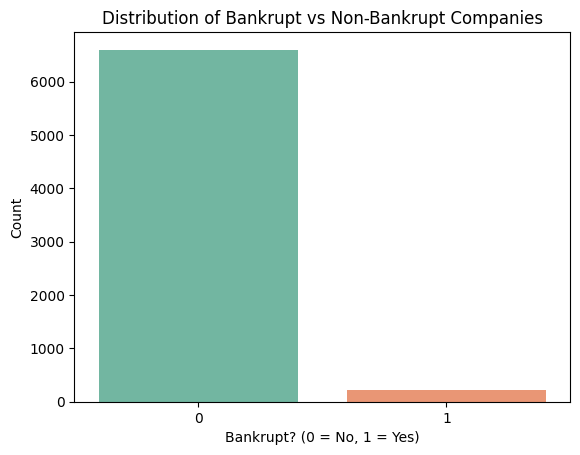

In [12]:
# Countplot for Bankruptcy vs Non-Bankruptcy

sns.countplot(data=df, x='Bankrupt?', palette='Set2')
plt.title('Distribution of Bankrupt vs Non-Bankrupt Companies')
plt.xlabel('Bankrupt? (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

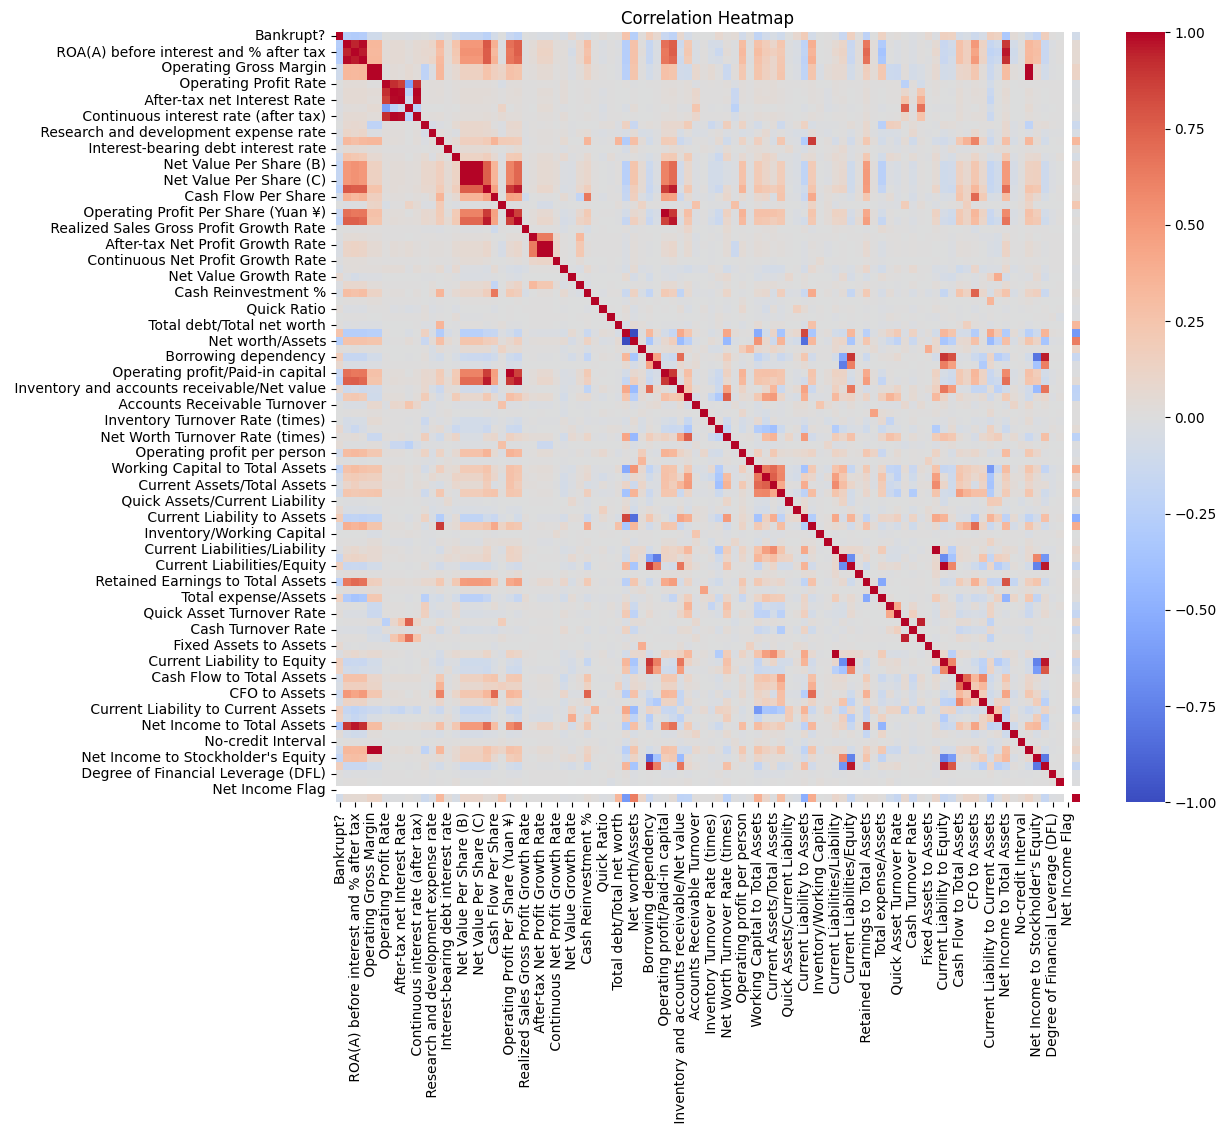

In [16]:
# Correlation Heatmap

plt.figure(figsize=(12, 10))
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm', annot=False)
plt.title('Correlation Heatmap')
plt.show()

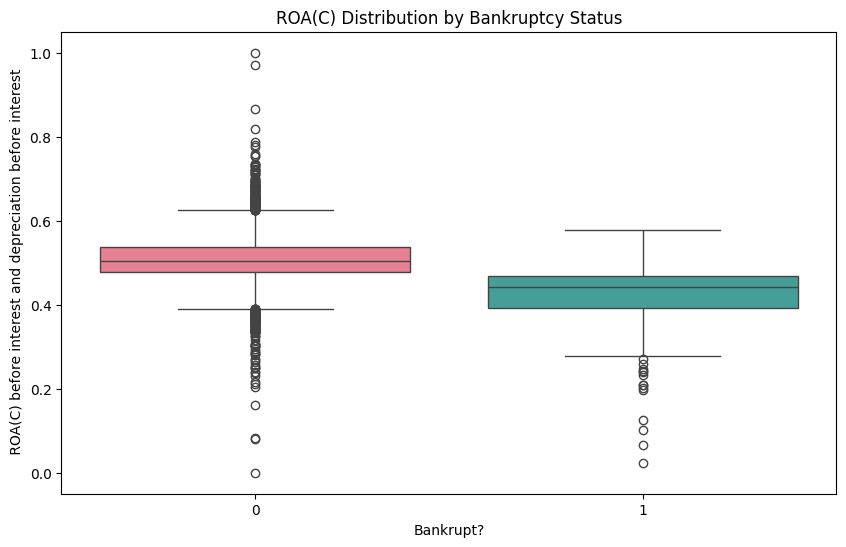

In [17]:
# Boxplot for Key Financial Ratios

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Bankrupt?', y=' ROA(C) before interest and depreciation before interest', palette='husl')
plt.title('ROA(C) Distribution by Bankruptcy Status')
plt.show()

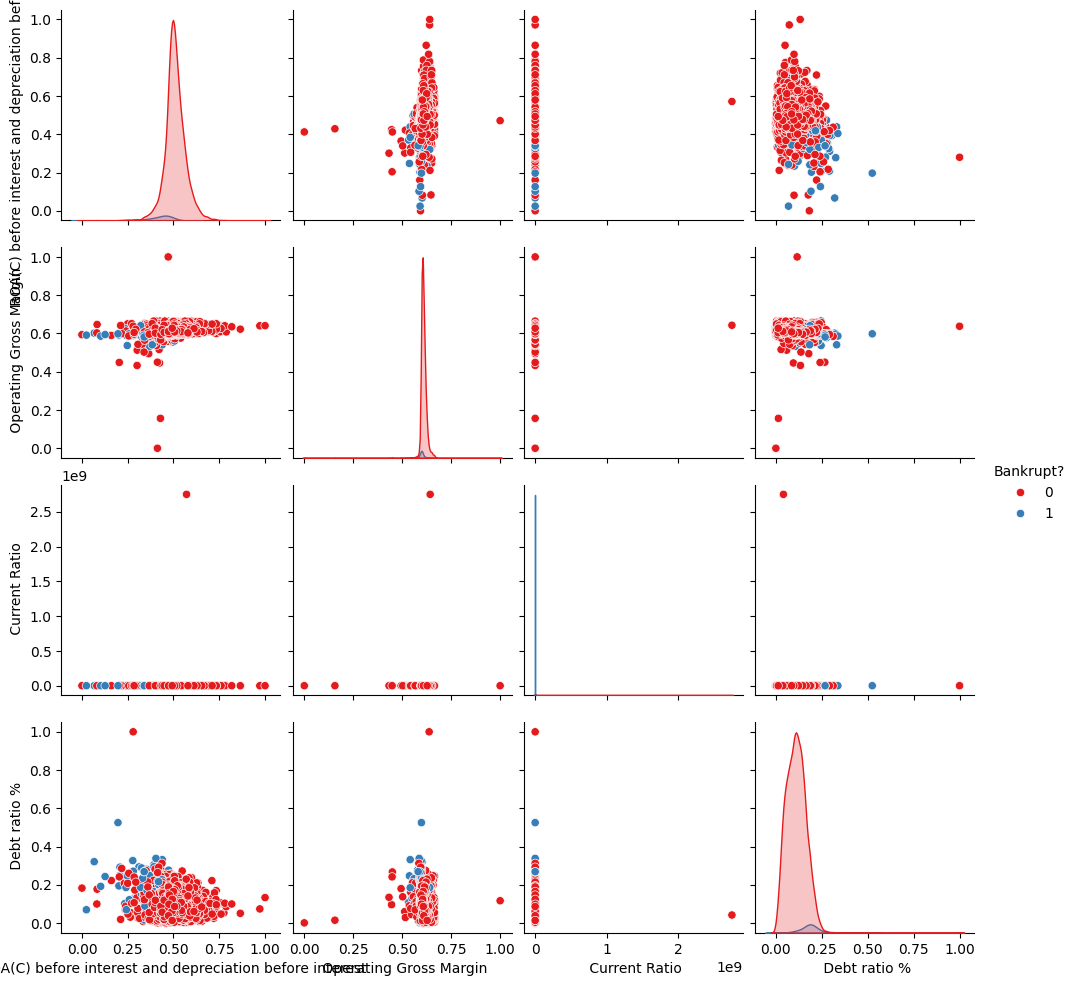

In [20]:
# Pairplot for Selected Features

selected_features = [' ROA(C) before interest and depreciation before interest',
                     ' Operating Gross Margin',
                     ' Current Ratio',
                     ' Debt ratio %',
                     'Bankrupt?']
sns.pairplot(df[selected_features], hue='Bankrupt?', palette='Set1')
plt.show()

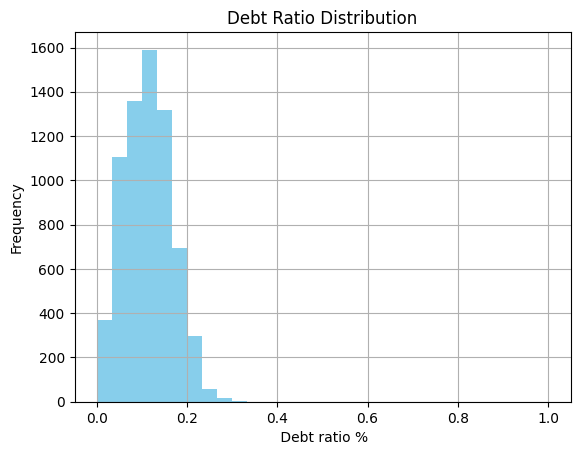

In [23]:
# Histogram for Continuous Variables

df[' Debt ratio %'].hist(bins=30, color='skyblue')
plt.title('Debt Ratio Distribution')
plt.xlabel(' Debt ratio %')
plt.ylabel('Frequency')
plt.show()

## Data Preprocessing

In [29]:
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel, mutual_info_classif, f_classif, SelectKBest
from sklearn.model_selection import train_test_split

In [30]:
X=df.drop(labels=['Bankrupt?'], axis=1)
y=df['Bankrupt?']

In [31]:
# SMOTE for data balance

from imblearn.over_sampling import SMOTE

oversample = SMOTE()
X,y=oversample.fit_resample(X,y)

In [32]:
# Feature Selection

feature_selection=SelectKBest(f_classif,k=30).fit(X,y)

selected_features=X.columns[feature_selection.get_support()]

In [33]:
# Standard Scaler

scaler=StandardScaler()
X_scale=scaler.fit_transform(X)

In [34]:
# Train test and split

X_train, X_test, y_train, y_test = train_test_split(X_scale, y,test_size=0.3)

## Model Building

In [35]:
from sklearn.svm import SVC

In [36]:
model = SVC()
model.fit(X_train, y_train)

SVC()

## Model Prediction

In [37]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [38]:
model.score(X_test,y_test)

0.9555555555555556

In [39]:
svc_predict=model.predict(X_test)

In [40]:
accuracy_score(y_test,svc_predict)

0.9555555555555556

In [41]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.92      0.95      1997
           1       0.93      0.99      0.96      1963

    accuracy                           0.96      3960
   macro avg       0.96      0.96      0.96      3960
weighted avg       0.96      0.96      0.96      3960

